<a href="https://colab.research.google.com/github/mvince33/Coding-Dojo/blob/main/week06/regression_metrics_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Metrics Exercise
- Michael Vincent
- 7/23/22

## Imports

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Load the data

In [ ]:
# Load the data
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSe42HvxZKvLbk-kdEqiGOXfjPrwv0Fjv_ZG8fqs19aPwiwn1GxKSfkcG-MeedlgXPR-SvIFPBC2xqF/pub?output=csv'
df = pd.read_csv(url)
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


## Explore the data

In [ ]:
df.info()
print()
print(df.describe())

print('\nThere are', df.duplicated().sum(), 'duplicates in the data set.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   NOX      506 non-null    float64
 2   RM       506 non-null    float64
 3   AGE      506 non-null    float64
 4   PTRATIO  506 non-null    float64
 5   LSTAT    506 non-null    float64
 6   PRICE    506 non-null    float64
dtypes: float64(7)
memory usage: 27.8 KB

             CRIM         NOX          RM         AGE     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524    0.554695    6.284634   68.574901   18.455534   12.653063   
std      8.601545    0.115878    0.702617   28.148861    2.164946    7.141062   
min      0.006320    0.385000    3.561000    2.900000   12.600000    1.730000   
25%      0.082045    0.449000    5.885500   45.025000   17.400000    6.950000   
50%      0.256510    0.538

## Make a heatmap

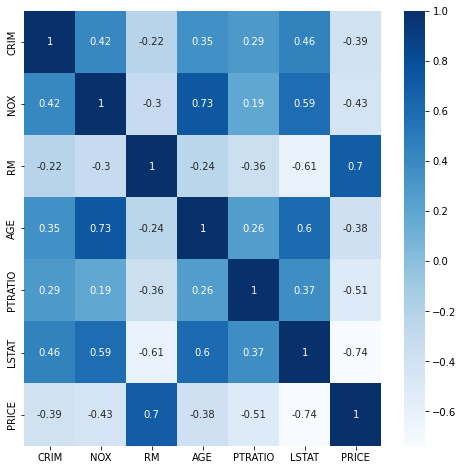

In [ ]:
# Make the heatmap
corr = df.corr()
plt.figure(figsize = (8, 8))
sns.heatmap(corr, cmap = 'Blues', annot = True)

>The following three features all have a correlation coefficient greater than or equal to 0.5 in absolute value with price.
- RM
- PTRATIO
- LSTAT

## Decide which features to use

In [ ]:
# Set the features and target
X = df[['RM', 'PTRATIO', 'LSTAT']]
y = df['PRICE']

## Split the data

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

## Build the model

In [ ]:
# Instantiate the scaler
scaler = StandardScaler()
# Instantiate the linear regression model
lin_reg = LinearRegression()
# Construct the pipeline
reg_pipe = make_pipeline(scaler, lin_reg)
# Fit the model to the training data
lin_reg.fit(X_train, y_train)

LinearRegression()

## Evaluate the model

In [ ]:
# Make the predictions
train_pred = lin_reg.predict(X_train)
test_pred = lin_reg.predict(X_test)

# Get the r2 scores
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

# Evaluate the MAE
X_train_MAE = mean_absolute_error(y_train, train_pred)
X_test_MAE = mean_absolute_error(y_test, test_pred)

# Evaluate the MSE
X_train_MSE = mean_squared_error(y_train, train_pred)
X_test_MSE = mean_squared_error(y_test, test_pred)

# Display the errors
print('The R2 score for the training set is', round(train_r2, 2))
print('The R2 score for the test set is', round(test_r2, 2))
print('The MAE for the training set is', round(X_train_MAE, 2))
print('The MAE for the test set is', round(X_test_MAE, 2))
print('The MSE for the training set is', round(X_train_MSE, 2))
print('The MSE for the test set is', round(X_test_MSE, 2))
print('The RMSE for the training set is', round(np.sqrt(X_train_MSE), 2))
print('The RMSE for the test set is', round(np.sqrt(X_test_MSE), 2))


The R2 score for the training set is 0.69
The R2 score for the test set is 0.63
The MAE for the training set is 3.71
The MAE for the test set is 3.39
The MSE for the training set is 27.69
The MSE for the test set is 25.69
The RMSE for the training set is 5.26
The RMSE for the test set is 5.07


> The R2 score for the training set is 0.69 while the R2 for the test set is 0.63. This means our model says the traning set accounts for 69% of the variation of the data, while our model says that 63% of the variation in the test datavariation is accounted for by the model. The mean absolute error for the test set says we expect our model to be have an error of about \$3400 when predicting the value of a "typical" house. The root mean squared error being larger than the mean absolute error suggests our model is making some large errors.